In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories (1).csv


In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('bestsellers with categories.csv')

In [ ]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [ ]:
print("Frequency of Categories of Genre :")
data['Genre'].value_counts()

Frequency of Categories of Genre :


Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [ ]:
categories = ['Fiction','Non-Fiction']
data['genre_num'] = pd.Categorical(data['Genre'], categories, ordered=True)
median_value = np.median(data['genre_num'].cat.codes)
median_cat = categories[int(median_value)]
print("Median Value of Genre is :", median_cat)

Median Value of Genre is : Non-Fiction


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


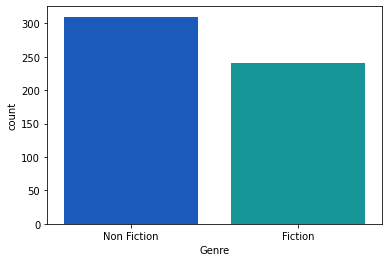

In [ ]:
sns.countplot(data['Genre'], palette='winter')

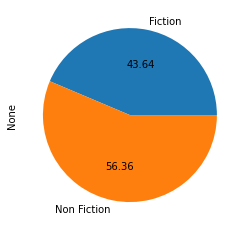

In [ ]:
data.groupby('Genre').size().plot(kind='pie', autopct='%.2f')

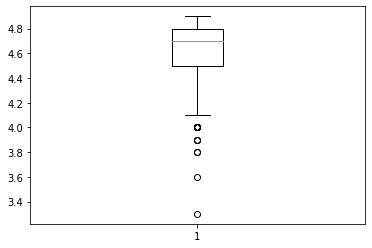

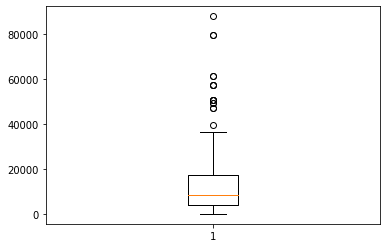

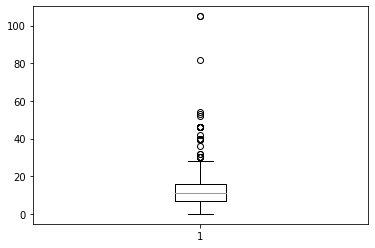

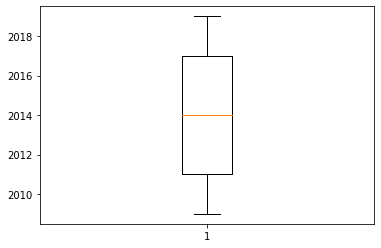

In [ ]:
labels = ['User Rating','Reviews','Price','Year']
for l in labels:
  plt.boxplot(data[l])
  plt.show()

In [ ]:
num_data = data.drop(['Name','Author','Genre','genre_num'], axis=1)
num_data.shape

(550, 4)

In [ ]:
num_data.head()

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_num_data = scaler.fit_transform(num_data)